In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.shape

(1338, 7)

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
columns=['age','bmi']
for col in columns:
    print(col)
    print(f"{col}: {df[col].min()}")
    print(f"{col}:{df[col].max()}")
    print('------------------------')

age
age: 18
age:64
------------------------
bmi
bmi: 16.0
bmi:53.1
------------------------


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
df.info

<bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [8]:
df.corr(numeric_only = True) 

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: >

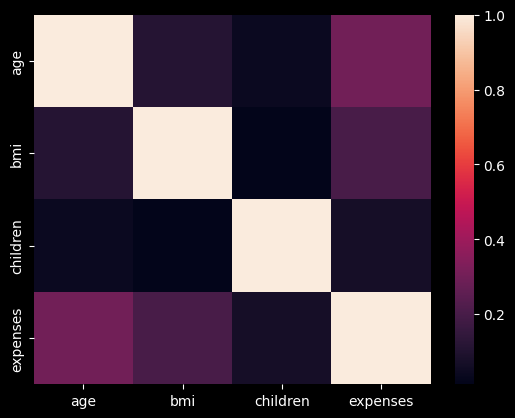

In [9]:
sns.heatmap(df.corr(numeric_only = True))

In [10]:
df.corr(numeric_only = True)['expenses']

age         0.299008
bmi         0.198576
children    0.067998
expenses    1.000000
Name: expenses, dtype: float64

In [11]:
smoker=df['smoker'].value_counts()

([<matplotlib.patches.Wedge at 0x2c525216af0>,
 [Text(-0.6598631335250117, -0.8801026332278258, 'no'),
  Text(0.6598631335250118, 0.8801026332278258, 'yes')],
 [Text(-0.3599253455590972, -0.48005598176063213, '79.5%'),
  Text(0.3599253455590973, 0.48005598176063213, '20.5%')])

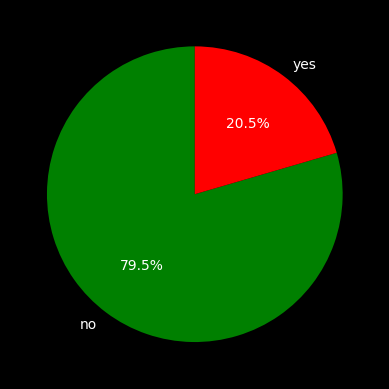

In [12]:
plt.pie(smoker.values,labels=smoker.index,startangle=90,colors=['green','red'],autopct='%1.1f%%')

In [13]:
children=df['children'].value_counts()

<Axes: title={'center': 'Children distribution in the dataset'}, xlabel='children', ylabel='count'>

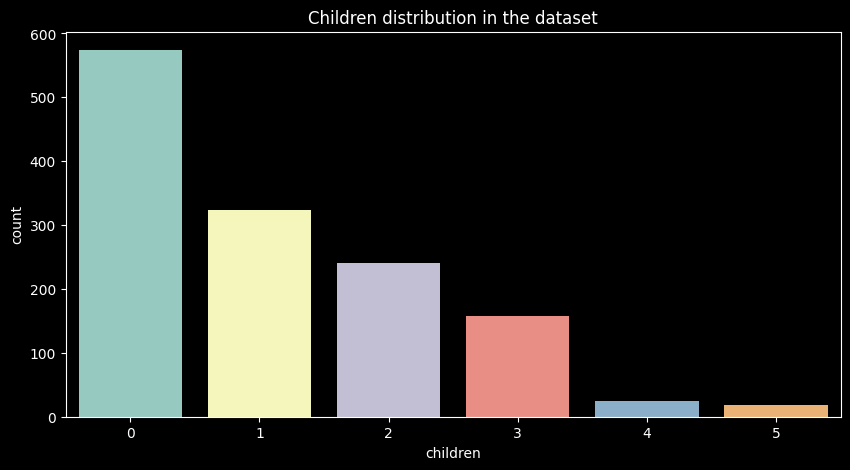

In [14]:
plt.figure(figsize=(10,5))
plt.title('Children distribution in the dataset')
sns.countplot(x=df['children'])

In [15]:
df.groupby(['region']).mean(numeric_only = True)['expenses']

region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64

<Axes: ylabel='region'>

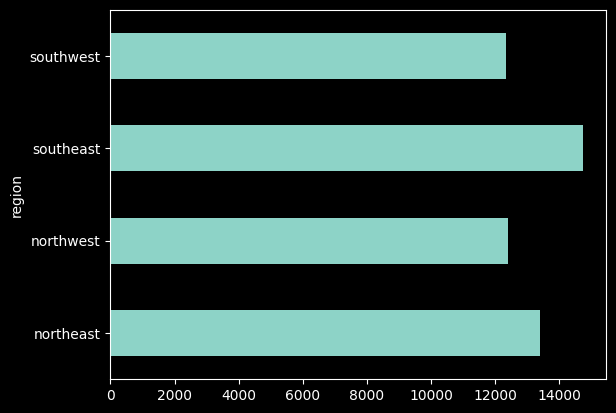

In [16]:
df.groupby(['region']).mean(numeric_only = True)['expenses'].plot(kind='barh')

In [17]:
sex_smoker=pd.DataFrame(df.groupby(['sex','smoker']).mean(numeric_only = True)['expenses'])
sex_smoker

expenses
sex    smoker              
female no       8762.297367
       yes     30678.996261
male   no       8087.204971
       yes     33042.006226

<Axes: xlabel='expenses', ylabel='Density'>

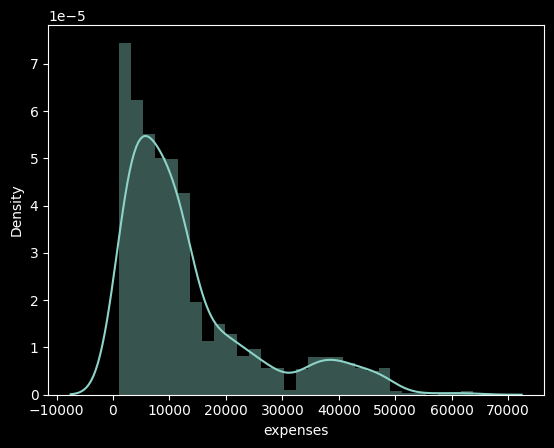

In [18]:
sns.distplot(df['expenses'])

In [19]:
df.groupby(['smoker']).mean(numeric_only = True)['expenses']

smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64

In [20]:
def show_outliers(column,df=df):
    q1=np.quantile(df[column],0.25)
    q3=np.quantile(df[column],0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    return df

In [21]:
outliers=show_outliers('expenses')

In [22]:
outliers.shape

(139, 7)

In [23]:
outliers['region'].value_counts()

region
southeast    57
southwest    34
northeast    28
northwest    20
Name: count, dtype: int64

In [24]:
df[df['expenses']<10000]

,age,sex,bmi,children,smoker,region,expenses
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
...,...,...,...,...,...,...,...
1326,42,female,32.9,0,no,northeast,7050.02
1327,51,male,30.0,1,no,southeast,9377.90
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83


In [25]:
712/1339

0.5317401045556386